In [302]:
import numpy as np
from halotools.empirical_models import Zheng07
import matplotlib.pyplot as plt
import time
from astropy.table import Table
%matplotlib inline
import plotting
from scipy.stats import ks_2samp
plotting.prettyplot()
#plotting.prettycolors()

In [303]:
def richness(group_id): 
    gals = Table() 
    gals['groupid'] = group_id
    gals['dummy'] = 1
    grouped_table = gals.group_by('groupid')
    grp_richness = grouped_table['dummy'].groups.aggregate(np.sum)
    return grp_richness

In [304]:
model1 = Zheng07(threshold = -21.0)
model2 = Zheng07(threshold = -21.0)
print model1.param_dict
print model2.param_dict

{'logM0': 11.92, 'sigma_logM': 0.39, 'logMmin': 12.79, 'alpha': 1.15, 'logM1': 13.94}
{'logM0': 11.92, 'sigma_logM': 0.39, 'logMmin': 12.79, 'alpha': 1.15, 'logM1': 13.94}


In [305]:
model2.param_dict['logM1'] = 13.5

In [296]:
model2.populate_mock()
model1.populate_mock()
group_id1 = model1.mock.compute_fof_group_ids()
group_richness1 = richness(group_id1)
group_id2 = model2.mock.compute_fof_group_ids()
group_richness2 = richness(group_id2)

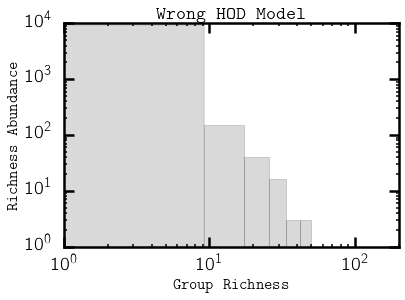

In [298]:
d2 , _ , _  = plt.hist(group_richness2 , bins = 10 ,facecolor='k', alpha=0.15)
plt.yscale("log")
plt.xscale("log")
plt.xlim((1,200))
plt.xlabel("Group Richness")
plt.ylabel("Richness Abundance")
plt.title("Wrong HOD Model")

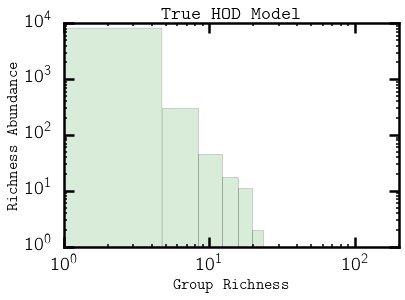

In [299]:
d1 , _ , _ = plt.hist(group_richness1 , bins = 10 , facecolor='green', alpha=0.15)
plt.yscale("log")
plt.xscale("log")
plt.xlim((1,200))
plt.xlabel("Group Richness")
plt.ylabel("Richness Abundance")
plt.title("True HOD Model")

In [306]:
print ks_2samp(d1[:] , d2[:])
print ks_2samp(group_richness1 , group_richness2)

(0.10000000000000009, 0.9999999942894181)
(0.080804942744483355, 3.2020568063917071e-26)


Binned Richness is not a good summary statistic for Kolomogrov Smirnov distance function!

In [307]:
hist_bins = np.arange(1,100000)

In [317]:
model1.populate_mock()
group_id_a = model1.mock.compute_fof_group_ids()
gr_a = richness(group_id_a)

hist1 = np.histogram(gr_a , bins = hist_bins)

In [318]:
model1.populate_mock()
group_id_b = model1.mock.compute_fof_group_ids()
gr_b = richness(group_id_b)

hist2 = np.histogram(gr_b , bins = hist_bins)

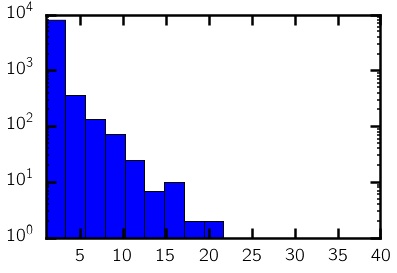

In [319]:
plt.hist(gr_a , bins = 20)
plt.xlim((1,40))
plt.yscale("log")

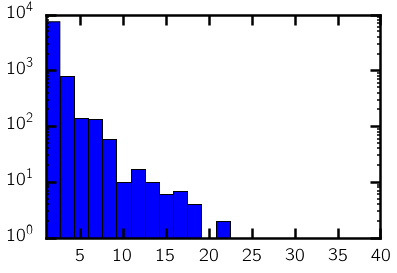

In [320]:
plt.hist(gr_b , bins = 20)
plt.xlim((1,40))
plt.yscale("log")

In [326]:
gr_mean = (hist1[0] + hist2[0])/2.
print gr_mean.shape
print gr_a

(99998,)
dummy
-----
    5
   14
    2
    4
    9
    5
    1
    3
    6
    2
  ...
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
Length = 8553 rows


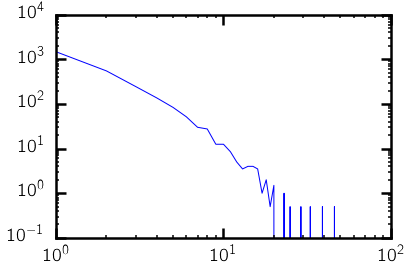

In [334]:
plt.plot(gr_mean)

plt.xlim((1,100))
plt.yscale("log")
plt.xscale("log")